In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [81]:
df = pd.read_csv('/content/MonetaryPolicyRate_monthly.csv')
print(df.columns)
print(df.info())
print(df['Value'].describe())
df.head()

Index(['Unnamed: 0', 'Mon-YY', 'Value', 'Year'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415 entries, 0 to 414
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  415 non-null    object 
 1   Mon-YY      414 non-null    object 
 2   Value       414 non-null    float64
 3   Year        414 non-null    float64
dtypes: float64(2), object(2)
memory usage: 13.1+ KB
None
count    414.000000
mean      14.088164
std        3.903235
min        6.000000
25%       12.000000
50%       13.500000
75%       16.000000
max       26.250000
Name: Value, dtype: float64


,Unnamed: 0,Mon-YY,Value,Year
0,0,Jan-90,18.5,1990.0
1,1,Feb-90,18.5,1990.0
2,2,Mar-90,18.5,1990.0
3,3,Apr-90,18.5,1990.0
4,4,May-90,18.5,1990.0


In [82]:
df = df.drop(['Unnamed: 0'], axis = 1)
df.head()

,Mon-YY,Value,Year
0,Jan-90,18.5,1990.0
1,Feb-90,18.5,1990.0
2,Mar-90,18.5,1990.0
3,Apr-90,18.5,1990.0
4,May-90,18.5,1990.0


In [84]:
df['Mon-YY'] = pd.to_datetime(df['Mon-YY'], format='%b-%y')

df = df.set_index('Mon-YY')
df.head(20)

,Value,Year
Mon-YY,,
1990-01-01,18.5,1990.0
1990-02-01,18.5,1990.0
1990-03-01,18.5,1990.0
1990-04-01,18.5,1990.0
1990-05-01,18.5,1990.0
1990-06-01,18.5,1990.0
1990-07-01,18.5,1990.0
1990-08-01,18.5,1990.0
1990-09-01,18.5,1990.0


In [85]:
df = df.drop(['Year'], axis = 1)
df.head()

,Value
Mon-YY,
1990-01-01,18.5
1990-02-01,18.5
1990-03-01,18.5
1990-04-01,18.5
1990-05-01,18.5


In [86]:
df['Value'].dtype

dtype('float64')

In [87]:
df['Value'].describe()

count    414.000000
mean      14.088164
std        3.903235
min        6.000000
25%       12.000000
50%       13.500000
75%       16.000000
max       26.250000
Name: Value, dtype: float64

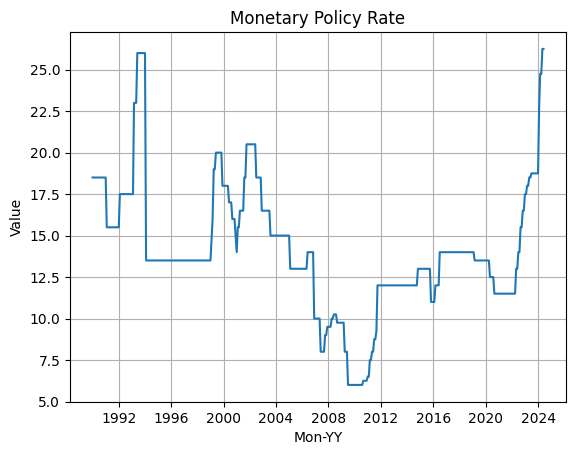

In [90]:
plt.plot(df.index, df['Value'])
plt.xlabel('Mon-YY')
plt.ylabel('Value')
plt.title('Monetary Policy Rate')
plt.grid(True)
plt.show()

In [89]:
df['Value'].median()

13.5

In [93]:
df['Value'].isna().sum()

1

In [94]:
df['Value'].isna()

Mon-YY
1990-01-01    False
1990-02-01    False
1990-03-01    False
1990-04-01    False
1990-05-01    False
              ...  
2024-03-01    False
2024-04-01    False
2024-05-01    False
2024-06-01    False
NaT            True
Name: Value, Length: 415, dtype: bool

In [98]:
df = df.dropna(subset= ['Value'])

In [99]:
df['Value'].isna().sum()

0

In [100]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [101]:
decomposition = seasonal_decompose(df['Value'], model='multiplicative', period=12)

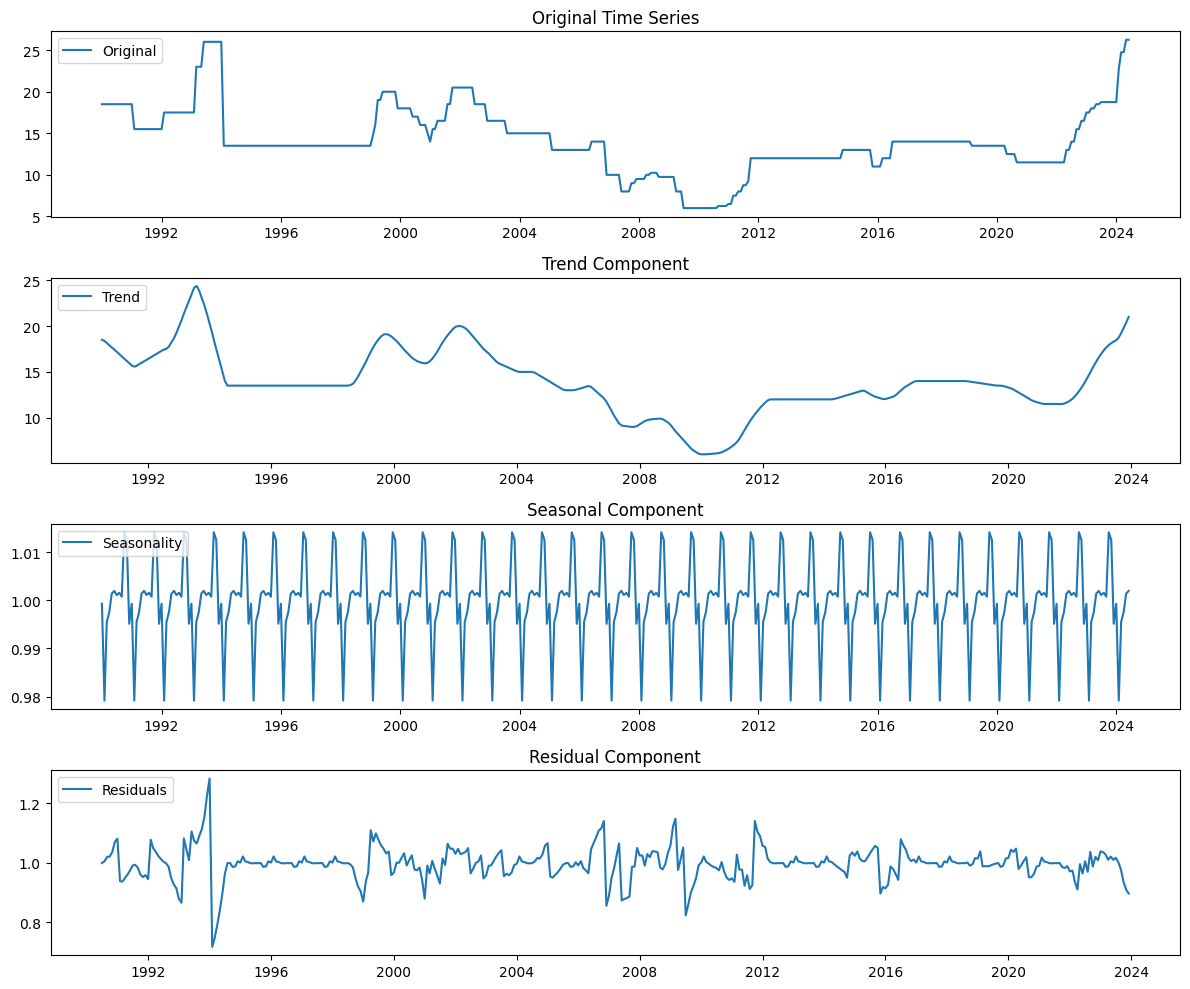

In [108]:
plt.figure(figsize=(12, 10))

plt.subplot(411)
plt.plot(df['Value'], label='Original')
plt.legend(loc='upper left')
plt.title('Original Time Series')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')
plt.title('Trend Component')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='upper left')
plt.title('Seasonal Component')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='upper left')
plt.title('Residual Component')

plt.tight_layout()
plt.show()

In [103]:
decomposition2 = seasonal_decompose(df['Value'], model='additive', period=12)

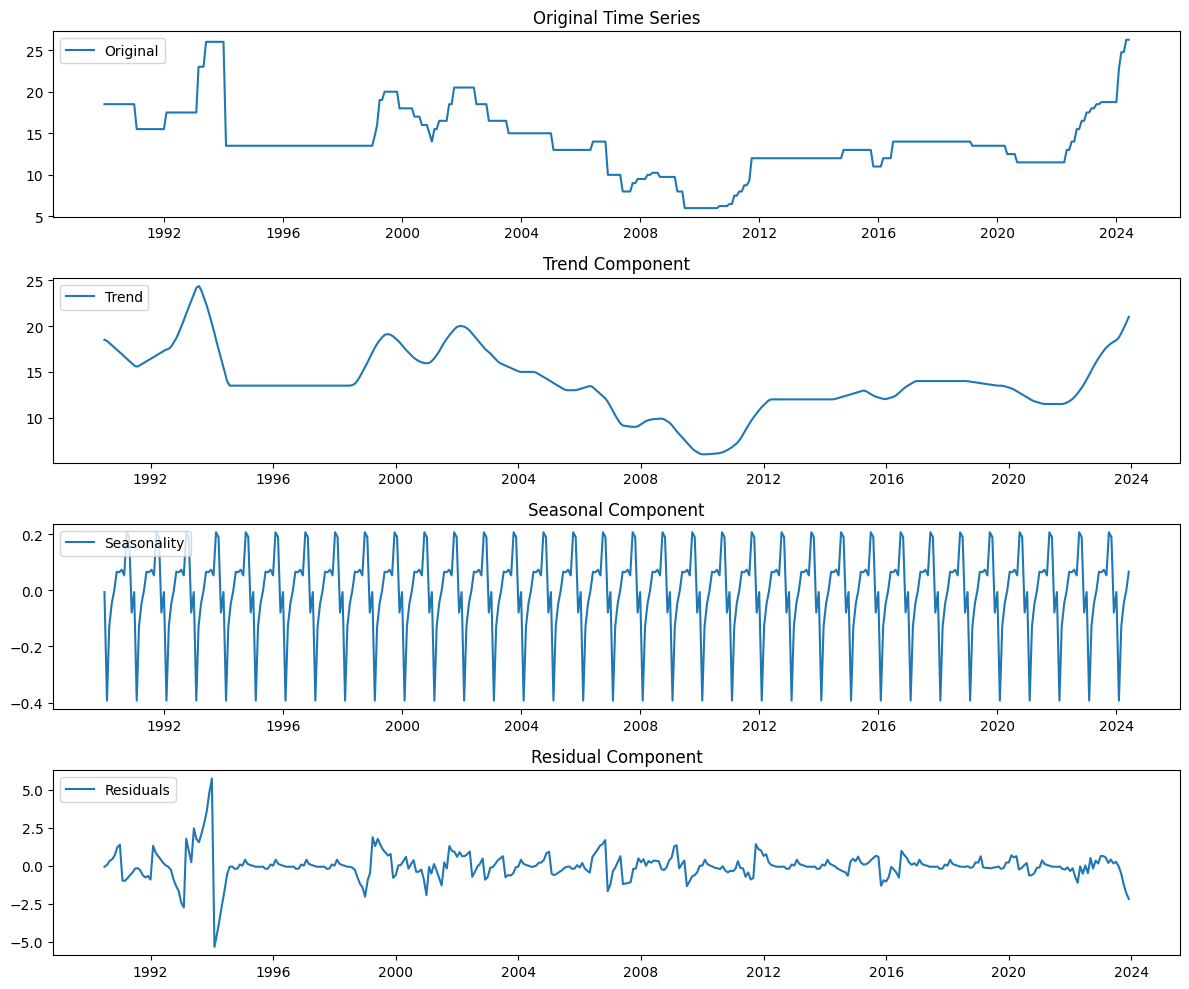

In [106]:
plt.figure(figsize=(12, 10))

plt.subplot(411)
plt.plot(df['Value'], label='Original')
plt.legend(loc='upper left')
plt.title('Original Time Series')

plt.subplot(412)
plt.plot(decomposition2.trend, label='Trend')
plt.legend(loc='upper left')
plt.title('Trend Component')

plt.subplot(413)
plt.plot(decomposition2.seasonal, label='Seasonality')
plt.legend(loc='upper left')
plt.title('Seasonal Component')

plt.subplot(414)
plt.plot(decomposition2.resid, label='Residuals')
plt.legend(loc='upper left')
plt.title('Residual Component')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Residual Component')

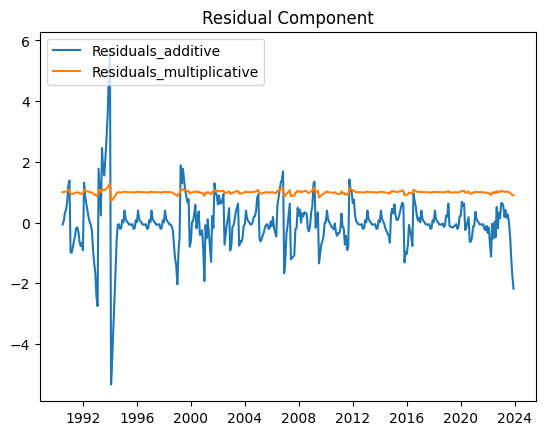

In [107]:
plt.subplot()
plt.plot(decomposition2.resid, label='Residuals_additive')
plt.legend(loc='upper left')
plt.title('Residual Component')
plt.subplot()
plt.plot(decomposition.resid, label='Residuals_multiplicative')
plt.legend(loc='upper left')
plt.title('Residual Component')

In [109]:
print('Multiplicative model shows more randomness in residual. Hence represents the trend better.')

Multiplicative model shows more randomness in residual. Hence represents the trend better.


<ipython-input-110-7768ed97714c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Log-Value'] = np.log(df['Value'])


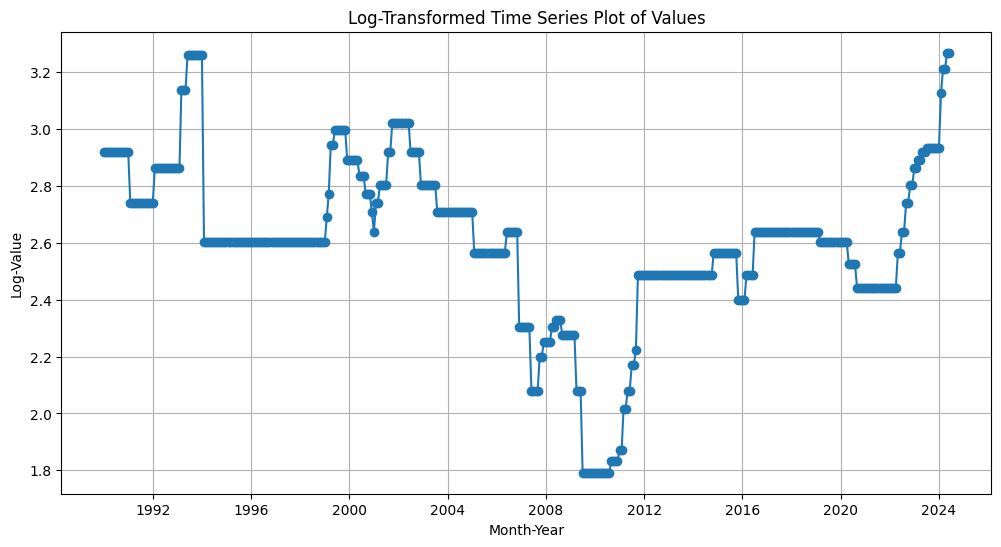

In [110]:
import numpy as np

# Apply log transformation
df['Log-Value'] = np.log(df['Value'])

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Log-Value'], marker='o')
plt.title('Log-Transformed Time Series Plot of Values')
plt.xlabel('Month-Year')
plt.ylabel('Log-Value')
plt.grid(True)
plt.show()

In [111]:
df.head()

,Value,Log-Value
Mon-YY,,
1990-01-01,18.5,2.917771
1990-02-01,18.5,2.917771
1990-03-01,18.5,2.917771
1990-04-01,18.5,2.917771
1990-05-01,18.5,2.917771


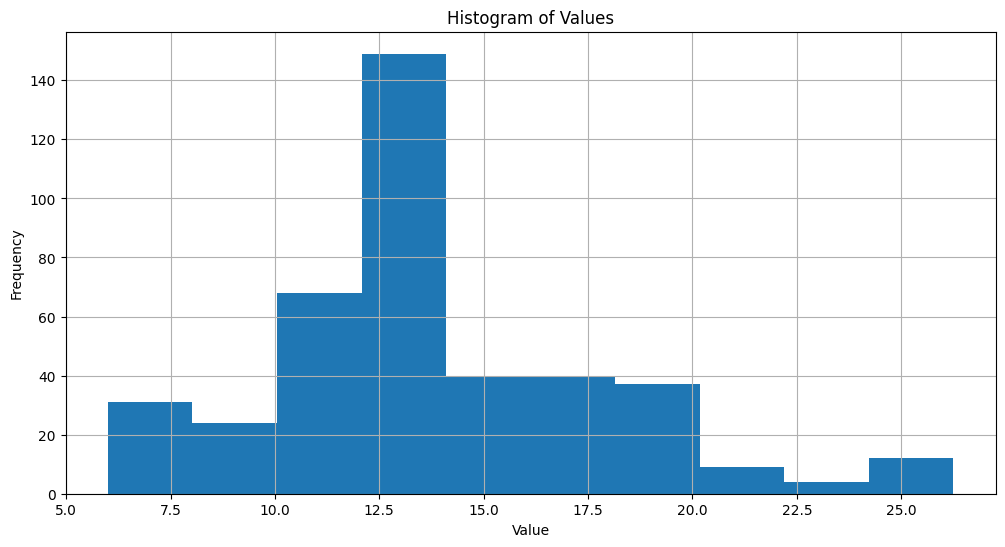

In [114]:
plt.figure(figsize=(12, 6))
plt.hist(df['Value'], bins=10, density=False)
plt.title('Histogram of Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


<ipython-input-116-198e5acf679a>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Value'], shade=True)


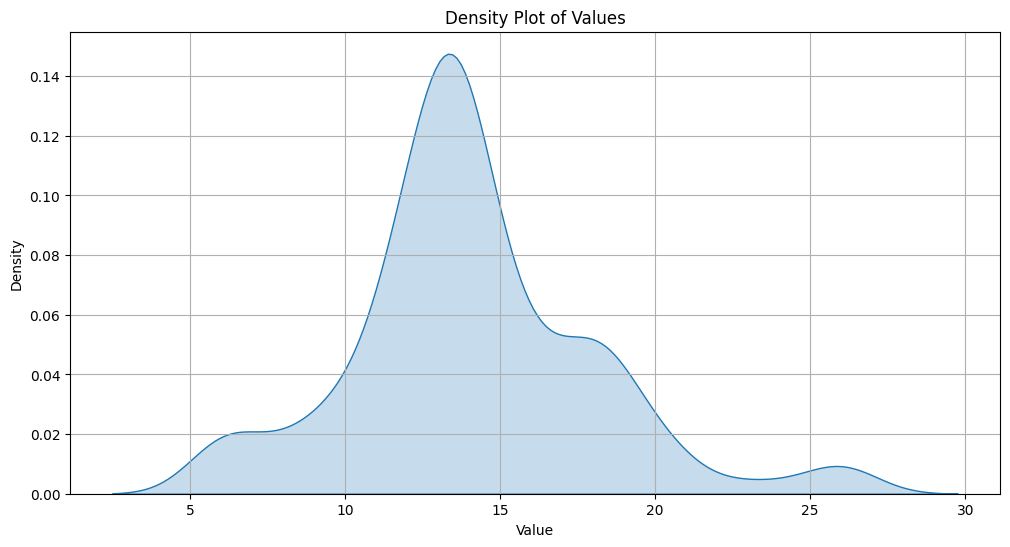

In [116]:
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.kdeplot(df['Value'], shade=True)
plt.title('Density Plot of Values')
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid(True)
plt.show()


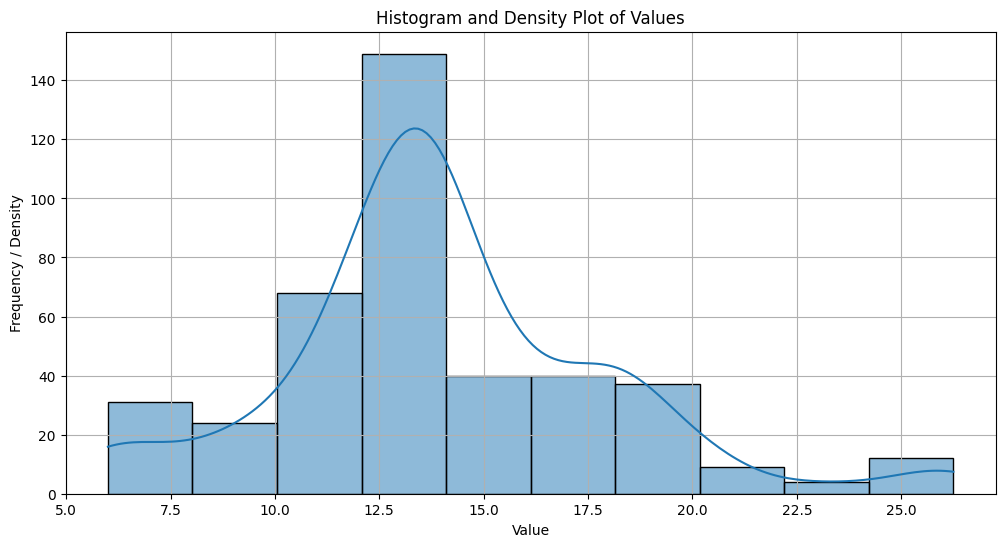

In [117]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Value'], bins=10, kde=True)
plt.title('Histogram and Density Plot of Values')
plt.xlabel('Value')
plt.ylabel('Frequency / Density')
plt.grid(True)
plt.show()


<ipython-input-118-f6fefad8f867>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MA_30'] = df['Value'].rolling(window=30).mean()


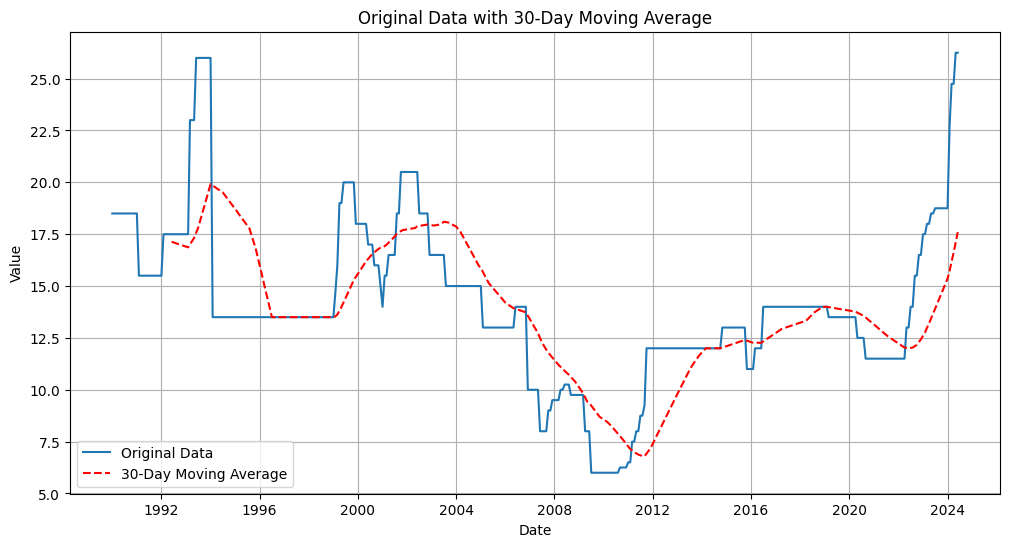

In [118]:
# Calculate 30-day moving average
df['MA_30'] = df['Value'].rolling(window=30).mean()

# Plot original data and moving average
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Value'], label='Original Data')
plt.plot(df.index, df['MA_30'], label='30-Day Moving Average', linestyle='--', color='red')
plt.title('Original Data with 30-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


<ipython-input-120-553b15e2549a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EWMA'] = df['Value'].ewm(span=30, adjust=False).mean()


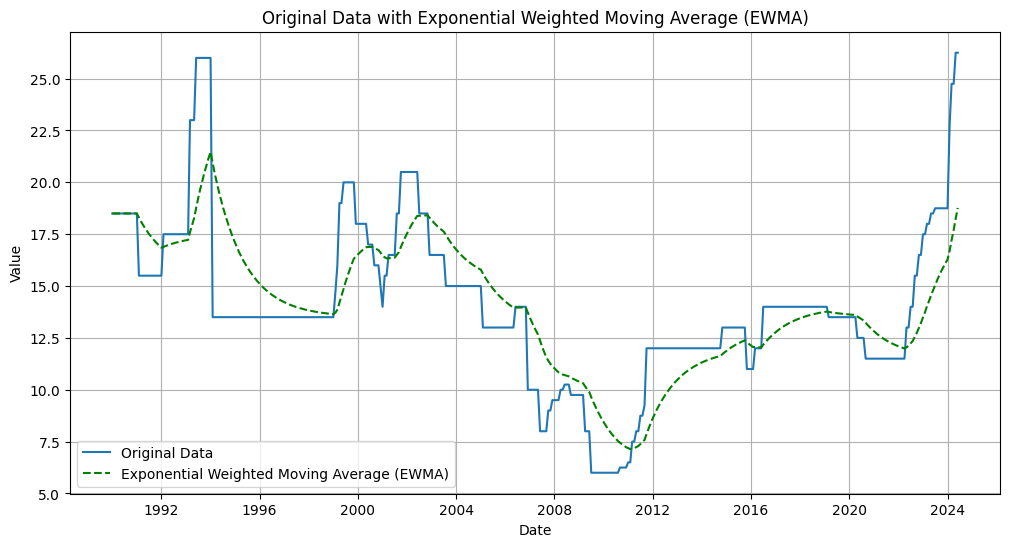

In [120]:
# Exponential smoothing
df['EWMA'] = df['Value'].ewm(span=30, adjust=False).mean()

# Plot original data and exponential smoothing
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Value'], label='Original Data')
plt.plot(df.index, df['EWMA'], label='Exponential Weighted Moving Average (EWMA)', linestyle='--', color='green')
plt.title('Original Data with Exponential Weighted Moving Average (EWMA)/')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


In [121]:
df.columns

Index(['Value', 'Log-Value', 'MA_30', 'EWMA'], dtype='object')

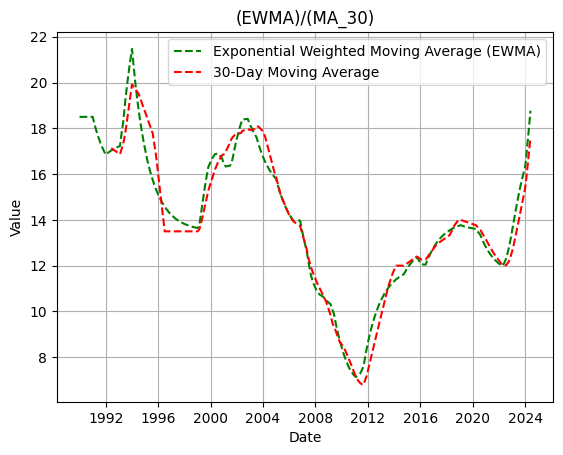

In [137]:

plt.plot(df.index, df['EWMA'], label='Exponential Weighted Moving Average (EWMA)', linestyle='--', color='green')
plt.plot(df.index, df['MA_30'], label='30-Day Moving Average', linestyle='--', color='red')
plt.title('(EWMA)/(MA_30)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [128]:
year_series = pd.Series(df.index.year)

In [133]:
correlation_with_time = df['Value'].corr(year_series)
print(correlation_with_time)

nan


In [134]:
from statsmodels.tsa.stattools import adfuller

# Example: Perform ADF test
result = adfuller(df['Value'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'\t{key}: {value}')


ADF Statistic: -1.491676117461446
p-value: 0.5376249523400751
Critical Values:
	1%: -3.4468044036406247
	5%: -2.868792838125
	10%: -2.57063355625


In [135]:
from statsmodels.tsa.stattools import kpss

# Example: Perform KPSS test
result = kpss(df['Value'], regression='c')
print('KPSS Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[3].items():
    print(f'\t{key}: {value}')


KPSS Statistic: 0.8033206920143413
p-value: 0.01
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


<ipython-input-135-78c8bced3868>:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(df['Value'], regression='c')


In [136]:
print('non - stationary data')

non - stationary data
